<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Text_Mining_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
tweet = pd.read_csv('/content/Elon_musk.csv', sep=',', encoding='latin-1')
tweet.shape

(1999, 2)

In [ ]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
tweet.dropna()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
tweet['Text'][150]

'@NASASpaceflight Unlike its aircraft division, which is fine, the FAA space division has a fundamentally broken reg\x85 https://t.co/sI63AXBJbz'

In [ ]:
text_blob_object = TextBlob(tweet['Text'][150])
print(text_blob_object.sentiment)

Sentiment(polarity=0.008333333333333331, subjectivity=0.45)


In [ ]:
def find_pol(review):
  return TextBlob(review).sentiment.polarity

tweet['Sentiment_Polarity'] = tweet['Text'].apply(find_pol)
tweet.head()

,Unnamed: 0,Text,Sentiment_Polarity
0,1,@kunalb11 Im an alien,-0.250000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000
2,3,@joerogan @Spotify Great interview!,1.000000
3,4,@gtera27 Doge is underestimated,0.000000
4,5,@teslacn Congratulations Tesla China for amazi...,0.345313


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


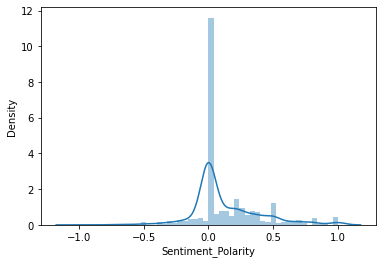

In [ ]:
sns.distplot(tweet['Sentiment_Polarity'])

In [ ]:
tweet['word_count'] = tweet['Text'].str.split().apply(len)
tweet['word_count'].head(10)

0     4
1    13
2     4
3     4
4    17
5     7
6    14
7     6
8    11
9     8
Name: word_count, dtype: int64

In [ ]:
tweet.sort_values(by='Sentiment_Polarity').tail(10)

,Unnamed: 0,Text,Sentiment_Polarity,word_count
231,232,@DMC_Ryan @Tesla It will be awesome,1.0,6
410,411,Merry Christmas &amp; happy holidays! <U+0001F...,1.0,7
1971,1972,I spoke with Korolevs family today.\nHe was o...,1.0,16
1723,1724,@RenataKonkoly @Sneakyness Mein Herz Brennt. B...,1.0,11
1139,1140,@ErcXspace @SpaceX @FelixSchlang @MarcusHouseG...,1.0,11
1025,1026,@Teslarati Great work by SpaceX valve engineer...,1.0,9
1725,1726,@Sneakyness One of the all time best,1.0,7
1082,1083,@mdcainjr @SpaceX @45thSpaceWing @NASA Great p...,1.0,6
455,456,@nytimes Very impressive mission by China!,1.0,6
57,58,@TheOnion Have you read @TheBabylonBee? Its g...,1.0,7


In [ ]:
tweet['Sentiment_Polarity'].describe()

count    1999.000000
mean        0.131671
std         0.265835
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: Sentiment_Polarity, dtype: float64

In [ ]:
tweet[tweet['Sentiment_Polarity']<=0].head()

,Unnamed: 0,Text,Sentiment_Polarity,word_count
0,1,@kunalb11 Im an alien,-0.25,4
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.00,13
3,4,@gtera27 Doge is underestimated,0.00,4
6,7,"Frodo was the underdoge,\nAll thought he would...",0.00,14
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0.00,11


In [ ]:
tweet[tweet['Sentiment_Polarity']>=20].head()

,Unnamed: 0,Text,Sentiment_Polarity,word_count


In [ ]:
tweet['index']=range(0,len(tweet))

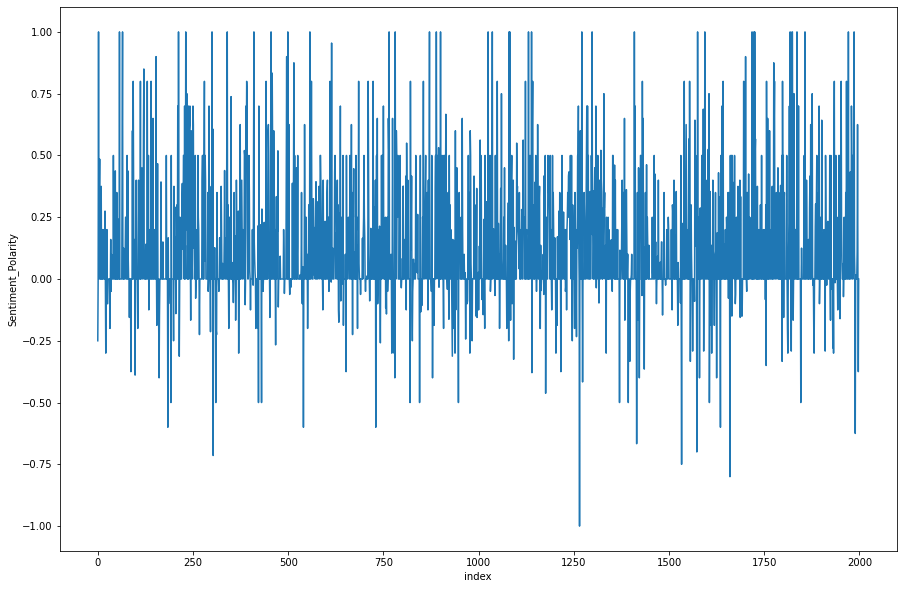

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='Sentiment_Polarity',x='index',data=tweet)

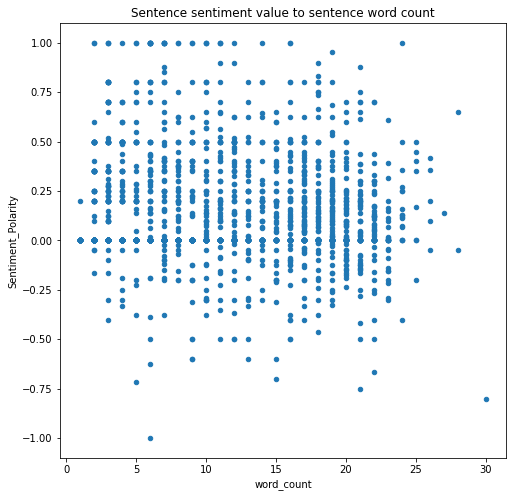

In [ ]:
tweet.plot.scatter(x='word_count', y='Sentiment_Polarity', figsize=(8,8), title='Sentence sentiment value to sentence word count')